# Import Data

In [11]:
# importing packages
import numpy as np
import pandas as pd

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import graphviz

In [5]:
data = pd.read_csv('data/training_data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


# Preprocess

In [7]:
X = data.drop(['dew','snow','weekday','increase_stock'],axis=1)
y = data[['increase_stock']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1337)

In [8]:
def print_metrics(model,X_test,y_test):
  y_preds = model.predict(X_test)
  y_test = np.array(y_test).reshape(-1)
  #Confusion Matrix
  cross_vals=pd.crosstab(y_preds, y_test)
  print(cross_vals)
  #True positive (Estimated true and is true)
  TP = cross_vals.iloc[1,1]
  #False positive (Estimated true and is false)
  FP = cross_vals.iloc[1,0]
  #True negative (Estiamted false and is false)
  TN = cross_vals.iloc[0,0]
  #False negative (Estimated false and is true)
  FN = cross_vals.iloc[0,1]
  missclassification_rate = np.mean([y_preds != y_test])
  print(f"Missclassification {missclassification_rate}")
  accuracy = 1-missclassification_rate
  print(f"Accuracy {accuracy}")
  recall = TP/(TP+FN)
  print(f"Recall {recall}")
  precision = TP/(TP+FP)
  print(f"Precision {precision}")
  specificity = TN/(TN+FP)
  print(f"Specificity {specificity}")

# Model

In [20]:
# model = skl_lm.LogisticRegression(solver='liblinear')
model = tree.DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                76               69
low_bike_demand                 12              323
Missclassification 0.16875
Accuracy 0.83125
Recall 0.8239795918367347
Precision 0.9641791044776119
Specificity 0.8636363636363636


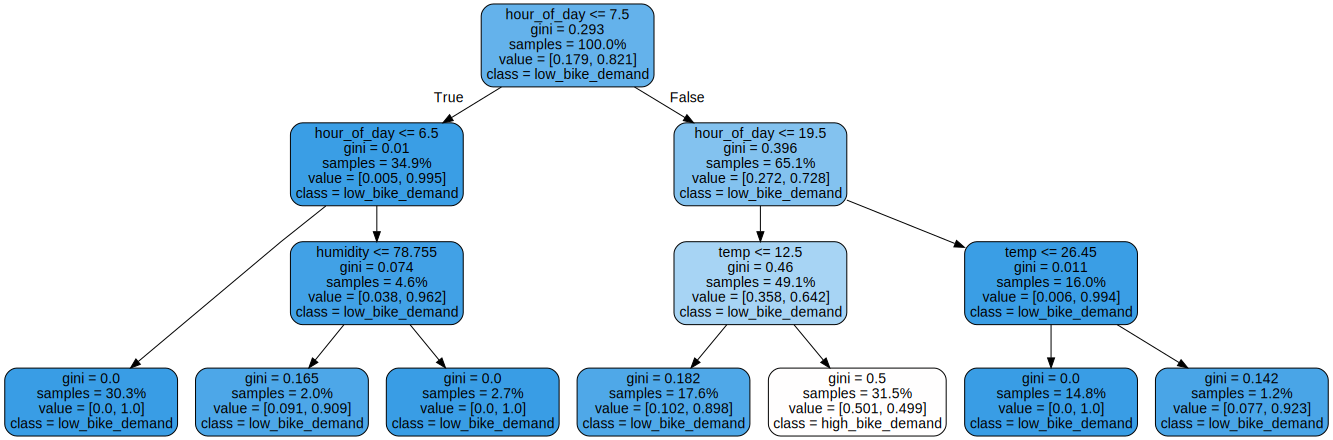

In [21]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, feature_names=X_train.columns, class_names=model.classes_, filled=True, rounded=True, leaves_parallel=True, proportion=True)

graph = graphviz.Source(dot_data)
graph

# hejjho

In [22]:
# Import libraries
import pandas as pd
from ydata_profiling import ProfileReport

# Load the data
df = pd.read_csv("data/training_data.csv")

# Produce and save the profiling report
profile = ProfileReport(df,title="HCC Profile Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]